# Reddened solar spectrum

sbpy's `sbpy.spectroscopy.SpectralGradient` can be used to redden a solar spectrum, although this approach may be revised with future sbpy capabilities.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from sbpy.spectroscopy import SpectralGradient
from sbpy.units import hundred_nm
from sbpy.calib import Sun

In [2]:
sun = Sun.from_builtin('E490_2014LR')
wave = np.linspace(0.3, 0.9, 300) * u.um
fluxd = sun.observe(wave)
S = SpectralGradient(14 * u.percent / hundred_nm, wave0=0.55 * u.um)
print(S)

14.0 % / 100 nm


`SpectralGradient` works with two-band photometry expressed as magnitudes.  To use it for a spectrum, the function `to_color()` must be repeatedly called:

In [3]:
color_index = u.Quantity([S.to_color((0.55 * u.um, w)) for w in wave])
# express in linear units (reflectance)
r = 10**(0.4 * color_index.value)

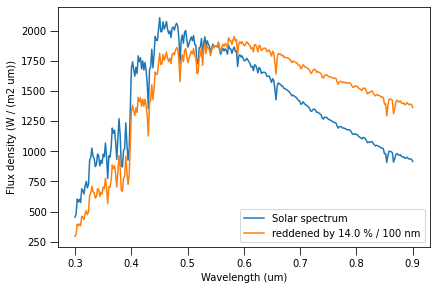

In [4]:
ax = plt.gca()
ax.plot(wave, fluxd, label='Solar spectrum')
ax.plot(wave, r * fluxd, label='reddened by {}'.format(S))
plt.setp(ax, ylabel='Flux density ({})'.format(fluxd.unit),
        xlabel='Wavelength ({})'.format(wave.unit))
plt.legend()
plt.show()